Pandas is a popular Python libary for working with data: https://pandas.pydata.org.

To use it in this notebook, we'll import it and give it the standard alias "pd".

In [3]:
import pandas as pd

## 1. Series and DataFrames

Pandas has two standard structures for working with data: 
- "Series" are like lists
- "DataFrames" are like tables

Pandas data objects include some special metadata, like column names and flexible indexes.

In [12]:
x_list = [1.4, 5.98, 12, 0.0]

print(x_list)

[1.4, 5.98, 12, 0.0]


In [14]:
type(x_list)  # type() is a function that identifies the data type of a variable

list

In [26]:
x_series = pd.Series({"x": [1.4, 5.98, 12, 0.0]})

print(x_series)

x    [1.4, 5.98, 12, 0.0]
dtype: object


In [25]:
type(x_series)

pandas.core.series.Series

In [19]:
df = pd.DataFrame({"x": [1.4, 5.98, 12, 0.0], "y": [17, 40, 52, 0]})

print(df)

       x   y
0   1.40  17
1   5.98  40
2  12.00  52
3   0.00   0


In [21]:
type(df)

pandas.core.frame.DataFrame

As you might expect, each of the columns of a DataFrame is a Series.

In [22]:
type(df['x'])

pandas.core.series.Series

Pandas is part of the same ecosystem as Matplotlib and NumPy, which we discussed in the prior demo. Pandas DataFrames even provide built-in shortcuts to quickly plot data with Matplotlib.

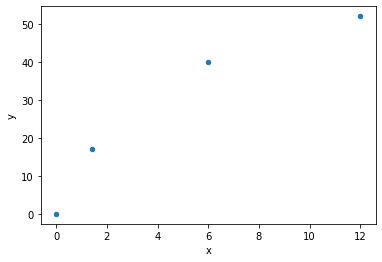

In [28]:
df.plot.scatter('x', 'y')

## 2. Loading and displaying data

We're going to look at some U.S. rent indexes from Zillow: https://www.zillow.com/research/data/

Pandas can load data directly from a URL. In this case, we'll get the median asking rents for 2-bedroom housing units.

In [31]:
url = "http://files.zillowstatic.com/research/public/Metro/Metro_MedianRentalPrice_2Bedroom.csv"

In [30]:
df = pd.read_csv(url)

Alternatively, you can load data "locally" -- from a file on the machine where Python is running. In this case, you'd pass to `pd.read_csv()` a **file path** instead of a URL.

And now we have a DataFrame!

In [52]:
type(df)

pandas.core.frame.DataFrame

How much data is there? `len()` is a standard Python function to get the length of things. If we pass it a DataFrame, it tells us the number of rows.

In [36]:
len(df)

384

And there's a DataFrame property called `shape` that tells us a little more.

In [35]:
df.shape  # rows x columns

(384, 122)

(In case you're curious why there aren't any parentheses at the end of `df.shape`, it's because "shape" isn't a function that we're executing, but rather a metadata property of the DataFrame.)

We can display the data as a table, too, although Jupyter notebooks aren't great for browsing through raw data. Usually, displaying a few rows is enough to give us a sense of what we're working with.

In [44]:
df.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,1225.0,1250.0,1250.0,1295.0,1200.0,1250.0,1300.0,1400.0,1400.0,1395.0,1395.0,1400.0,1350.0,1250.0,1200.0,1250.0,1250.0,1250.0,1300.0,1325.0,1375.0,1345.0,1319.0,1325.0,1300.0,1295.0,1300.0,1300.0,1250.0,1300.0,1350.0,1350.0,1370.0,1350.0,1405.0,1425.0,1500.0,1600.0,1500.0,1600.0,1600.0,1595.0,1600.0,1638.0,1715.0,1750.0,1550.0,1550.0,1519.0,1500.0,1495.0,1450.0,1475.0,1500.0,1528.0,1540.0,1599.0,1580.0,1595.0,1595.0,1550.0,1522.0,1505.0,1525.0,1550.0,1590.0,1600.0,1600.0,1600.0,1599.0,1650.0,1600.0,1588.5,1600.0,1637.0,1500.0,1549.0,1500.0,1530.0,1575.0,1575.0,1575.0,1575.0,1559.0,1535.0,1510.0,1500.0,1509.0,1520.0,1550.0,1580.0,1600.0,1620.0,1634.0,1649.0,1642.0,1600.0,1600.0,1600.0,1600.0,1600.0,1625.0,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2545.0,2595.0,2595.0,2550.0,2500.0,2500.0,2500.0,2500.0,2500.0,2595.0,2545.0,2500.0,2500.0,2500.0,2500.0,2462.0,2450.0,2400.0,2450.0,2495.0,2500.0,2500.0,2545.0,2549.0,2500.0,2595.0,2600.0,2595.0,2400.0,2400.0,2395.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2490.0,2400.0,2400.0,2395.0,2375.0,2365.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2499.0,2415.0,2400.0,2400.0,2400.0,2400.0,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0
2,"Los Angeles-Long Beach-Anaheim, CA",2,NaN,1950.0,1900.0,1992.5,1980.0,1997.0,2100.0,2150.0,1947.5,1895.0,1895.0,1900.0,1800.0,1840.0,1825.0,1875.0,1900.0,1900.0,1900.0,1860.0,1800.0,1750.0,1700.0,1700.0,1719.5,1750.0,1785.0,1775.0,1789.0,1780.0,1770.0,1785.0,1800.0,1790.0,1780.0,1735.0,1750.0,1797.0,1815.0,1815.0,1850.0,1850.0,1845.0,1800.0,1900.0,1900.0,1800.0,1995.0,1950.0,1905.0,1900.0,1945.0,1995.0,2022.0,2090.0,2095.0,2100.0,2149.0,2145.0,2161.5,2165.0,2160.0,2155.0,2195.0,2200.0,2210.0,2215.0,2250.0,2250.0,2276.0,2300.0,2295.0,2300.0,2323.0,2365.0,2350.0,2350.0,2350.0,2330.0,2330.0,2350.0,2300.0,2330.0,2295.0,2350.0,2450.0,2495.0,2500.0,2500.0,2500.0,2495.0,2495.0,2495.0,2495.0,2472.0,2475.0,2454.0,2495.0,2499.0,2500.0,2500.0,2520.0,2550.0,2575.0,2544.0,2560.0,2560.0,2568.5,2556.0,2585.0,2595.0,2605.0,2620.0,2628.0,2635.0,2650.0,2670.0,2650.0,2650.0,2650.0
3,"Chicago, IL",3,NaN,NaN,1345.0,1350.0,1350.0,1400.0,1400.0,1375.0,1357.0,1400.0,1400.0,1475.0,1432.5,1499.0,1500.0,1550.0,1595.0,1650.0,1600.0,1595.0,1600.0,1550.0,1495.0,1495.0,1495.0,1475.0,1450.0,1399.0,1425.0,1500.0,1485.0,1480.0,1495.0,1500.0,1450.0,1495.0,1451.0,1550.0,1500.0,1500.0,1600.0,1633.0,1650.0,1655.0,1650.0,1595.0,1600.0,1695.0,1550.0,1500.0,1500.0,1545.0,1600.0,1600.0,1695.0,1600.0,1695.0,1650.0,1600.0,1495.0,1500.0,1625.0,1550.0,1600.0,1600.0,1600.0,1600.0,1600.0,1650.0,1645.0,1695.0,1600.0,1595.0,1695.0,1600.0,1600.0,1650.0,1650.0,1607.0,1600.0,1578.0,1550.0,1500.0,15

But some of the columns are missing! We can fix this by adjusting a Pandas library setting.

In [53]:
pd.set_option("display.max.columns", None)  # None means no maximum, a.k.a. everything

In [46]:
df.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,1225.0,1250.0,1250.0,1295.0,1200.0,1250.0,1300.0,1400.0,1400.0,1395.0,1395.0,1400.0,1350.0,1250.0,1200.0,1250.0,1250.0,1250.0,1300.0,1325.0,1375.0,1345.0,1319.0,1325.0,1300.0,1295.0,1300.0,1300.0,1250.0,1300.0,1350.0,1350.0,1370.0,1350.0,1405.0,1425.0,1500.0,1600.0,1500.0,1600.0,1600.0,1595.0,1600.0,1638.0,1715.0,1750.0,1550.0,1550.0,1519.0,1500.0,1495.0,1450.0,1475.0,1500.0,1528.0,1540.0,1599.0,1580.0,1595.0,1595.0,1550.0,1522.0,1505.0,1525.0,1550.0,1590.0,1600.0,1600.0,1600.0,1599.0,1650.0,1600.0,1588.5,1600.0,1637.0,1500.0,1549.0,1500.0,1530.0,1575.0,1575.0,1575.0,1575.0,1559.0,1535.0,1510.0,1500.0,1509.0,1520.0,1550.0,1580.0,1600.0,1620.0,1634.0,1649.0,1642.0,1600.0,1600.0,1600.0,1600.0,1600.0,1625.0,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2545.0,2595.0,2595.0,2550.0,2500.0,2500.0,2500.0,2500.0,2500.0,2595.0,2545.0,2500.0,2500.0,2500.0,2500.0,2462.0,2450.0,2400.0,2450.0,2495.0,2500.0,2500.0,2545.0,2549.0,2500.0,2595.0,2600.0,2595.0,2400.0,2400.0,2395.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2490.0,2400.0,2400.0,2395.0,2375.0,2365.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2499.0,2415.0,2400.0,2400.0,2400.0,2400.0,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0
2,"Los Angeles-Long Beach-Anaheim, CA",2,NaN,1950.0,1900.0,1992.5,1980.0,1997.0,2100.0,2150.0,1947.5,1895.0,1895.0,1900.0,1800.0,1840.0,1825.0,1875.0,1900.0,1900.0,1900.0,1860.0,1800.0,1750.0,1700.0,1700.0,1719.5,1750.0,1785.0,1775.0,1789.0,1780.0,1770.0,1785.0,1800.0,1790.0,1780.0,1735.0,1750.0,1797.0,1815.0,1815.0,1850.0,1850.0,1845.0,1800.0,1900.0,1900.0,1800.0,1995.0,1950.0,1905.0,1900.0,1945.0,1995.0,2022.0,2090.0,2095.0,2100.0,2149.0,2145.0,2161.5,2165.0,2160.0,2155.0,2195.0,2200.0,2210.0,2215.0,2250.0,2250.0,2276.0,2300.0,2295.0,2300.0,2323.0,2365.0,2350.0,2350.0,2350.0,2330.0,2330.0,2350.0,2300.0,2330.0,2295.0,2350.0,2450.0,2495.0,2500.0,2500.0,2500.0,2495.0,2495.0,2495.0,2495.0,2472.0,2475.0,2454.0,2495.0,2499.0,2500.0,2500.0,2520.0,2550.0,2575.0,2544.0,2560.0,2560.0,2568.5,2556.0,2585.0,2595.0,2605.0,2620.0,2628.0,2635.0,2650.0,2670.0,2650.0,2650.0,2650.0
3,"Chicago, IL",3,NaN,NaN,1345.0,1350.0,1350.0,1400.0,1400.0,1375.0,1357.0,1400.0,1400.0,1475.0,1432.5,1499.0,1500.0,1550.0,1595.0,1650.0,1600.0,1595.0,1600.0,1550.0,1495.0,1495.0,1495.0,1475.0,1450.0,1399.0,1425.0,1500.0,1485.0,1480.0,1495.0,1500.0,1450.0,1495.0,1451.0,1550.0,1500.0,1500.0,1600.0,1633.0,1650.0,1655.0,1650.0,1595.0,1600.0,1695.0,1550.0,1500.0,1500.0,1545.0,1600.0,1600.0,1695.0,1600.0,1695.0,1650.0,1600.0,1495.0,1500.0,1625.0,1550.0,1600.0,1600.0,1600.0,1600.0,1600.0,1650.0,1645.0,1695.0,1600.0,1595.0,1695.0,1600.0,1600.0,1650.0,1650.0,1607.0,1600.0,1578.0,1550.0,1500.0,15

## 3. Cleaning up columns

It's pretty common that raw data files will have way more columns than you need, with obscure names as well.

My favorite approach is to start by creating _new_ columns with better names. This is more flexible than renaming columns in place because it's easier to undo.

In [47]:
df['region'] = df['RegionName']
df['rent'] = df['2019-12']  # we only care about the most recent values

What did this do? (You can get a custom number of rows from `df.head()` by passing it as an argument.)

In [49]:
df.head(2)

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,region,rent
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,1225.0,1250.0,1250.0,1295.0,1200.0,1250.0,1300.0,1400.0,1400.0,1395.0,1395.0,1400.0,1350.0,1250.0,1200.0,1250.0,1250.0,1250.0,1300.0,1325.0,1375.0,1345.0,1319.0,1325.0,1300.0,1295.0,1300.0,1300.0,1250.0,1300.0,1350.0,1350.0,1370.0,1350.0,1405.0,1425.0,1500.0,1600.0,1500.0,1600.0,1600.0,1595.0,1600.0,1638.0,1715.0,1750.0,1550.0,1550.0,1519.0,1500.0,1495.0,1450.0,1475.0,1500.0,1528.0,1540.0,1599.0,1580.0,1595.0,1595.0,1550.0,1522.0,1505.0,1525.0,1550.0,1590.0,1600.0,1600.0,1600.0,1599.0,1650.0,1600.0,1588.5,1600.0,1637.0,1500.0,1549.0,1500.0,1530.0,1575.0,1575.0,1575.0,1575.0,1559.0,1535.0,1510.0,1500.0,1509.0,1520.0,1550.0,1580.0,1600.0,1620.0,1634.0,1649.0,1642.0,1600.0,1600.0,1600.0,1600.0,1600.0,1625.0,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0,United States,1595.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2545.0,2595.0,2595.0,2550.0,2500.0,2500.0,2500.0,2500.0,2500.0,2595.0,2545.0,2500.0,2500.0,2500.0,2500.0,2462.0,2450.0,2400.0,2450.0,2495.0,2500.0,2500.0,2545.0,2549.0,2500.0,2595.0,2600.0,2595.0,2400.0,2400.0,2395.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2490.0,2400.0,2400.0,2395.0,2375.0,2365.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2499.0,2415.0,2400.0,2400.0,2400.0,2400.0,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0,"New York, NY",2375.0


Then, we can make a copy of the DataFrame with just the columns we want.

In [50]:
rents = df[['region', 'rent']].copy()

(For the curious: This will also work without `copy()` at the end. But sometimes you'll run into errors later on. **Without** `copy()`, the new variable only contains a reference to sections of the original DataFrame -- so if you try to change any of the data values, you run into problems. **With** copy, you truly duplicate the contents.)

In [51]:
rents.head()

,region,rent
0,United States,1595.0
1,"New York, NY",2375.0
2,"Los Angeles-Long Beach-Anaheim, CA",2650.0
3,"Chicago, IL",1600.0
4,"Dallas-Fort Worth, TX",1582.0


## 4 Descriptive statistics